# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import linear_model, pipeline, preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

**PART-1**

In [ ]:
df.head()


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
y_price = df[["Price"]]
x_mileage = df[["Mileage"]]
LR = LinearRegression()
LR.fit(x_mileage, y_price)


LinearRegression()

In [ ]:
print('intercept:', LR.intercept_)
print('coefficients:', LR.coef_)
print('R2 score:', LR.score(x_mileage, y_price))

intercept: [24764.55900606]
coefficients: [[-0.1725205]]
R2 score: 0.02046344732348926


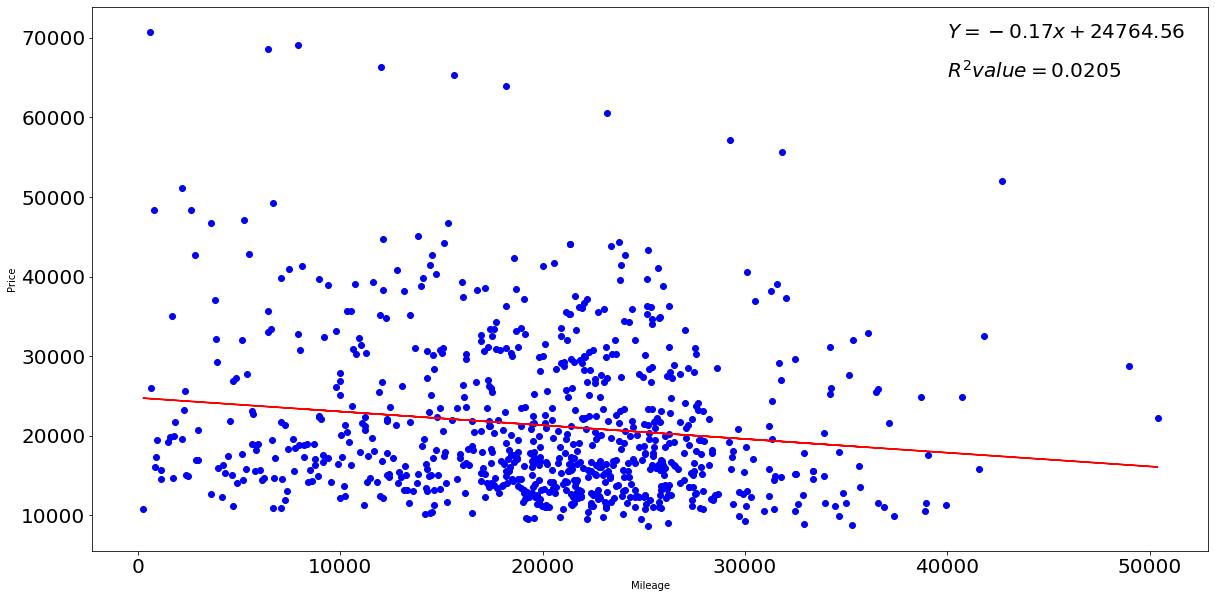

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.scatter(x_mileage, y_price, color='blue') 
plt.plot(x_mileage, LR.predict(x_mileage), color='red')
plt.text(40000, 70000, '$Y = %.2fx + %.2f$' % (LR.coef_, LR.intercept_), fontsize=20)
plt.text(40000, 65000, '$R^2 value = %.4f$'% r2_score(y_price, LR.predict(x_mileage)), fontsize=20)
plt.ylabel("Price")
plt.xlabel('Mileage')

plt.show()

**The R2 score of 0.0205 is not a good score and hence the equation of Y = -0.17x + 24764 is not a good fit.**

**PART-2**

In [ ]:
Car_Features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
Car_Price = ["Price"]
X = df[Car_Features]
Y = df[Car_Price]
LR2 = LinearRegression()
LR2.fit(X, Y)


LinearRegression()

In [ ]:
print('intercept:', LR2.intercept_)
print('coefficients:', LR2.coef_)
print('R2 score:', LR2.score(X, Y))

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]
R2 score: 0.4462643536728379


**The R2 score of 0.446 is also not a good score and hence there is no strong correlation.**

In [ ]:
from itertools import combinations

In [ ]:
combos = []
   
for i in range(1, 7):
    combos.append(combinations(Car_Features, i))

In [ ]:
check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
        model = model.fit(x,Y)
        model_score = model.score(x, Y)
        if check_score < model.score(x, Y):
            check_score = model.score(x, Y)
            maxgroup = groupx
            best_degree = degree
            
print(degree," ", maxgroup," ", 'model_score =', check_score)

7   ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']   model_score = 0.9097847608829751


**The best combination is using 6 factors 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather' for predicting price which gives R2 score of 0.909**

**HARD MODE**

In [ ]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [ ]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X2 = df_with_dummies[columns]
Y2 = df_with_dummies['Price']
LR2 = LinearRegression()
LR2.fit(X2, Y2)

LinearRegression()

In [ ]:
print('Intercept:', LR2.intercept_)
print('Coefficient:',LR2.coef_)
print('R2 Score:', LR2.score(X2, Y2))

Intercept: 23983.77190961674
Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03]
R2 Score: 0.9363889951039477


**When we use dummies for Make, Model and Type, the R2 score is 0.936 which is greater than the R2 score without using the factors Make, Model and Type**

**The best combination is using all data. It gives R2 score up to 93%.**